# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [77]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [78]:
# print the first 500 characters to see a sample of the data

print(results[:1000])

{"type":"FeatureCollection","metadata":{"generated":1615860092000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.10.3","count":337},"features":[{"type":"Feature","properties":{"mag":4.3,"place":"127 km SW of Jiquilillo, Nicaragua","time":1615857045752,"updated":1615857601040,"tz":null,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/us7000djmr","detail":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000djmr.geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"status":"reviewed","tsunami":0,"sig":284,"net":"us","code":"7000djmr","ids":",us7000djmr,","sources":",us,","types":",origin,phase-data,","nst":null,"dmin":1.426,"rms":0.93,"gap":176,"magType":"mb","type":"earthquake","title":"M 4.3 - 127 km SW of Jiquilillo, Nicaragua"},"geometry":{"type":"Point","coordinates":[-88.2249,11.8853,10]},"id":"us7000djmr"},
{"type":"Feature","properties":{"mag":4.9,"

In [79]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [80]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 4.3, 'place': '127 km SW of Jiquilillo, Nicaragua', 'time': 1615857045752, 'updated': 1615857601040, 'tz': None, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000djmr', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000djmr.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'reviewed', 'tsunami': 0, 'sig': 284, 'net': 'us', 'code': '7000djmr', 'ids': ',us7000djmr,', 'sources': ',us,', 'types': ',origin,phase-data,', 'nst': None, 'dmin': 1.426, 'rms': 0.93, 'gap': 176, 'magType': 'mb', 'type': 'earthquake', 'title': 'M 4.3 - 127 km SW of Jiquilillo, Nicaragua'}, 'geometry': {'type': 'Point', 'coordinates': [-88.2249, 11.8853, 10]}, 'id': 'us7000djmr'}


In [81]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])

pp.pprint(quakes[0]['properties'])

{'coordinates': [-88.2249, 11.8853, 10], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '7000djmr',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us7000djmr.geojson',
 'dmin': 1.426,
 'felt': None,
 'gap': 176,
 'ids': ',us7000djmr,',
 'mag': 4.3,
 'magType': 'mb',
 'mmi': None,
 'net': 'us',
 'nst': None,
 'place': '127 km SW of Jiquilillo, Nicaragua',
 'rms': 0.93,
 'sig': 284,
 'sources': ',us,',
 'status': 'reviewed',
 'time': 1615857045752,
 'title': 'M 4.3 - 127 km SW of Jiquilillo, Nicaragua',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',origin,phase-data,',
 'tz': None,
 'updated': 1615857601040,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us7000djmr'}


In [82]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 4.3 - 127 km SW of Jiquilillo, Nicaragua
M 4.9 - 267 km ENE of Gisborne, New Zealand
M 4.6 - Volcano Islands, Japan region
M 2.5 - 52 km NW of Toyah, Texas
M 2.7 - 52 km NW of Toyah, Texas
M 5.2 - Kermadec Islands region
M 5.1 - Kermadec Islands region
M 5.0 - 4 km NNE of Sakai, Japan
M 2.7 - 151km SSE of Estacion Coahuila, B.C., MX
M 5.2 - Kermadec Islands region
M 2.6 - 90km ESE of Maneadero, B.C., MX
M 4.2 - 25 km SW of San Juan, Peru
M 2.8 - 75 km WNW of Haines Junction, Canada
M 4.9 - 11 km SSW of Tsarítsani, Greece
M 4.4 - 101 km W of San Antonio de los Cobres, Argentina
M 4.3 - 184 km NNE of Baukau, Timor Leste
M 3.6 - 74 km NNW of San Antonio, Puerto Rico
M 2.5 - 25 km W of Happy Valley, Alaska
M 2.6 - 63 km ESE of Port Heiden, Alaska
M 3.2 - 4 km NE of Eastborough, Kansas
M 3.1 - 3 km NE of Eastborough, Kansas
M 4.6 - south of the Fiji Islands
M 4.7 - 9 km ENE of Santiago, Philippines
M 3.2 - 7 km NNE of San Antonio, Puerto Rico
M 2.6 - 25 km W of Volcano, Hawaii
M 5.3 - New

In [83]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

337


In [84]:
# print the first few lines of data

print(df.head())

   magnitude       depth
0        4.3   10.000000
1        4.9   10.000000
2        4.6  157.490000
3        2.5    6.465771
4        2.7    6.877100


In [85]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  337.000000  337.000000
mean     3.976202   56.816860
std      0.985476  113.388484
min      2.450000   -0.990000
25%      2.870000   10.000000
50%      4.300000   10.000000
75%      4.800000   44.000000
max      6.000000  612.780000


<AxesSubplot:xlabel='magnitude', ylabel='depth'>

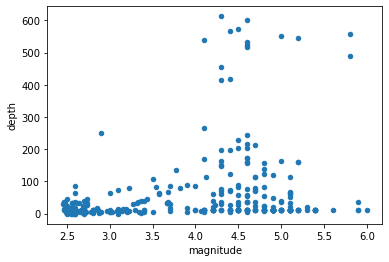

In [86]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [87]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [88]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0  magnitude       depth
0           0        4.3   10.000000
1           1        4.9   10.000000
2           2        4.6  157.490000
3           3        2.5    6.465771
4           4        2.7    6.877100


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [89]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [90]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [91]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [92]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [93]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [94]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [95]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [96]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [97]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @KentuckyWBB: Let the San Antonio stroll begin...

Powered by @UK_HealthCare.

https://t.co/a95km4qLB9
RT @KentuckyMBB: Coming up right after the softball game is over on @SECNetwork.
RT @KentuckyWBB: The dancin’ started...

Tonight. 🩰 https://t.co/beQSps6XXV
RT @UKBaseball: The boys showed up and showed out over the weekend. #WeAreUK https://t.co/XS1rOsbhQk
RT @SEC: https://t.co/rRLyMdqpTi


In [98]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Mar 16 00:30:07 +0000 2021',
 'entities': {'hashtags': [],
              'media': [{'display_url': 'pic.twitter.com/rRLyMdqpTi',
                         'expanded_url': 'https://twitter.com/SEC/status/1371617349296607232/photo/1',
                         'id': 1371612163224317954,
                         'id_str': '1371612163224317954',
                         'indices': [9, 32],
                         'media_url': 'http://pbs.twimg.com/media/Ewjx_s6XMAIKwlP.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/Ewjx_s6XMAIKwlP.jpg',
                         'sizes': {'large': {'h': 1080,
                                             'resize': 'fit',
                                             'w': 1920},
                                   'medium': {'h': 675,
                                              'resize': 'fit',
                                              'w': 1200},
             

### Other API endpoints allow different types of searches

In [99]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

@IQ_GodSon looking sharp tonight for the @nyknicks #bbn #WeAreUK

Great watching this and fun seeing highlights of them playing against a young @MagicJohnson #BBN https://t.co/lUXCjAe26P

RT @Kentuckyweather: Not even sure this is possible at this point, but Kentucky and Louisville should schedule a game this month and donate…

Congrats @Bud_Dupree Good luck in everything you do except your play when you have your home coming lol jk #BBN… https://t.co/oannPGt0OX

Bud Dupree joining Titans    #BBN https://t.co/qVaz4hW0yj



In [100]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @jawale_samiksha: #FakeTheoryInIslamOnRebirth
मुस्लिम धर्मगुरुओं का मानना है कि पुनर्जन्म नहीं होता है। जबकि बाख़बर संत रामपाल जी महाराज…

जय श्री हनुमान की जय 
🛕🕉⛳🌺🙏 https://t.co/mQJsXgqMZP

RT @Tris_0580: आप लोगों से एक सवाल है सच सच बताना।
आंसू देने वाला दिल के ज्यादा करीब होता है । या आंसू पोछने वाला ?
       🙏🙏 जय श्री राम 🙏🙏

RT @JansamparkK: ◾️उद्यानिकी कृषकों के लिये शासन की सार्थक पहल
-
◾️’’पर ड्रॉप-मोर क्रॉप’’ के तहत ले सकते हैं योजना का लाभ
-
◾️ड्रिप सिंचाई…

🌅 #GodMorningTuesday

परमात्मा सदा साथ रहने वाला व सच्चा ज्ञान देने वाला है।

“अधिक जानकारी के लिए Sant Rampal Ji M… https://t.co/5hQbASkqJi



In [101]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Monday got you feeling blue?☔️💙💎📘Tag a sister to show them some love!! #BBN #RhoIota #LIOB @ Phi Mu at the Universi… https://t.co/qvKqPHCy7V

If it isn’t on social media, it didn’t happen #firstdosedone💉✔️ @ University of Kentucky https://t.co/9FXFj9lrQy



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

In [102]:
# search for public tweets in Arabic

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ar', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

يالله تعبت من هالكوابيس الي مو راضيه تخليني أنام

@fhf00f كلنا 🌚

@nova5633 كم الرقم

@Jumanauo انتم مافهمتوا 🤣🤣🤣خلاص بيصير يحط رياكشنات ماعاد بيكتب 🤣🤣🤣كل ما كتب تحول المنشن تصحيح إملائي 🤣🤣



In [103]:
endpoint = 'statuses/filter'
params = {'locations': '-120,30,-60,45'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['text'])
    print(tweet['created_at'])
    print(tweet['coordinates'])
    print(tweet['reply_count'])
    print(tweet['retweet_count'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

#ilovecrepes @ Epcot https://t.co/5K6IXfIb4o
Tue Mar 16 02:01:44 +0000 2021
{'type': 'Point', 'coordinates': [-81.54973269, 28.37402527]}
0
0
Florida, USA, United States
#ilovecrepes @ Epcot https://t.co/5K6IXfIb4o

Matt: “It doesn’t get more real than this.” #TheBachelor
Us: https://t.co/pALsdjFErP
Tue Mar 16 02:01:44 +0000 2021
None
0
0
Brooklyn, NY, United States
Matt: “It doesn’t get more real than this.” #TheBachelor
Us: https://t.co/pALsdjFErP

Fav
Tue Mar 16 02:01:44 +0000 2021
None
0
0
Wyoming, MI, United States
Fav

@cameronaddison_ I JUST WANT A NORMAL SWIMSUIT!
Tue Mar 16 02:01:44 +0000 2021
None
0
0
Lubbock, TX, United States
@cameronaddison_ I JUST WANT A NORMAL SWIMSUIT!

@DrAmyMarschall You are right about that! 

Here the jacket &amp; glasses is giving me life 😍.
Tue Mar 16 02:01:44 +0000 2021
None
0
0
Washington, DC, United States
@DrAmyMarschall You are right about that! 

Here the jacket &amp; glasses is giving me life 😍.

@JAMJAMPICS @Zinebds6 ADORABLE 💋💋💋
Tue Mar 1

### Bonus: Streaming live tweets in real time 

In [104]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Tue Mar 16 02:01:47 +0000 2021
Lomas de Zamora, Argentina, Argentina
@FedeAR17 Gracias a Dios no lo tengo instalado

Tue Mar 16 02:01:47 +0000 2021
Manhattan, NY, United States
Forgot about Foley and JFM and suddenly I’m excited about a Jets DL unit for the first time in my life

Tue Mar 16 02:01:47 +0000 2021
Manaus, Brasil, Brasil
Protagonista : Juliette
O resto : figurantes

Tue Mar 16 02:01:47 +0000 2021
São Luís, Brasil, Brasil
@mariaclaraaroc 😍😍😍

Tue Mar 16 02:01:47 +0000 2021
Rio de Janeiro, Brasil, Brasil
QUE AMOR

Tue Mar 16 02:01:47 +0000 2021
Salt Lake City, UT, United States
@jkcox16 I feel like we say this every season and the next season’s like “Hold my beer.”

Tue Mar 16 02:01:47 +0000 2021
Rio de Janeiro, Brasil, Brasil
O lado bom d você se sentir triste por certas situações, é você saber q uma hora tudo se ajeita, tudo passa !!

Tue Mar 16 02:01:47 +0000 2021
Hvidovre, Danmark, Denmark
@jespersteinmetz @Mariestoppelaar @tv2danmark @Oscars2021 👏🙏

Tue Mar 16 02:01:47 +

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [105]:
# pull out lartitude and longitude into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

ll = {'latitude': [q['geometry']['coordinates'][0] for q in quakes],
     'longitude': [q['geometry']['coordinates'][1] for q in quakes]}

llp = pd.DataFrame.from_dict(ll)

# how many earthquakes were loaded into the dataframe?
print(len(llp))

337


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

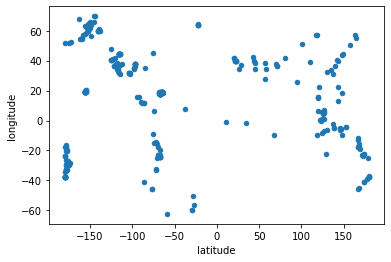

In [106]:
llp.plot(x='latitude', y='longitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  


In [143]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)


results = client.get("tvq9-ec9w", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,specimen_collection_date,case_disposition,transmission_category,case_count,last_updated_at
0,2021-03-13T00:00:00.000,Confirmed,Community,3,2021-03-15T16:11:05.380
1,2021-03-13T00:00:00.000,Confirmed,Unknown,4,2021-03-15T16:11:05.380
2,2021-03-13T00:00:00.000,Confirmed,From Contact,2,2021-03-15T16:11:05.380
3,2021-03-12T00:00:00.000,Confirmed,From Contact,15,2021-03-15T16:11:05.380
4,2021-03-12T00:00:00.000,Confirmed,Unknown,4,2021-03-15T16:11:05.380
...,...,...,...,...,...
1235,2020-03-08T00:00:00.000,Confirmed,From Contact,1,2021-03-15T16:11:05.380
1236,2020-03-07T00:00:00.000,Confirmed,From Contact,5,2021-03-15T16:11:05.380
1237,2020-03-05T00:00:00.000,Confirmed,Community,1,2021-03-15T16:11:05.380
1238,2020-03-05T00:00:00.000,Confirmed,From Contact,5,2021-03-15T16:11:05.380


In [128]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)


# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("5yjb-v3mj", limit=100000)
results


[{'census_block': '0101001000',
  'census_block_full': '170310101001000',
  'total_population': '128'},
 {'census_block': '0101001001',
  'census_block_full': '170310101001001',
  'total_population': '71'},
 {'census_block': '0101001002',
  'census_block_full': '170310101001002',
  'total_population': '45'},
 {'census_block': '0101001003',
  'census_block_full': '170310101001003',
  'total_population': '335'},
 {'census_block': '0101002000',
  'census_block_full': '170310101002000',
  'total_population': '152'},
 {'census_block': '0101002001',
  'census_block_full': '170310101002001',
  'total_population': '45'},
 {'census_block': '0101002002',
  'census_block_full': '170310101002002',
  'total_population': '363'},
 {'census_block': '0101002003',
  'census_block_full': '170310101002003',
  'total_population': '42'},
 {'census_block': '0101002004',
  'census_block_full': '170310101002004',
  'total_population': '154'},
 {'census_block': '0101002005',
  'census_block_full': '170310101002

In [141]:
results_df = pd.DataFrame.from_records(results)
results_df

,census_block,census_block_full,total_population
0,0101001000,170310101001000,128
1,0101001001,170310101001001,71
2,0101001002,170310101001002,45
3,0101001003,170310101001003,335
4,0101002000,170310101002000,152
...,...,...,...
46286,9801001006,170319801001006,0
46287,9801001007,170319801001007,0
46288,9801001008,170319801001008,0
46289,9801001009,170319801001009,0


In [142]:
results_df[results_df['total_population']=='0']

,census_block,census_block_full,total_population
13,0101002009,170310101002009,0
19,0101003001,170310101003001,0
20,0101003002,170310101003002,0
49,0102012004,170310102012004,0
50,0102012005,170310102012005,0
...,...,...,...
46286,9801001006,170319801001006,0
46287,9801001007,170319801001007,0
46288,9801001008,170319801001008,0
46289,9801001009,170319801001009,0
